In [61]:
%pip install seaborn

In [62]:
import pandas as pd

In [63]:
data = pd.read_csv('cars_2010_2020.csv')

In [64]:
data.head(20)

,Make,Model,Year,Engine Size (L),Fuel Type,Price (USD)
0,Volkswagen,Jetta,2010,4.2,Petrol,54073.09
1,Honda,Pilot,2017,4.2,Hybrid,44924.91
2,Nissan,Murano,2011,4.2,Hybrid,76963.44
3,Toyota,RAV4,2010,2.4,Petrol,30871.25
4,Nissan,Altima,2010,3.6,Petrol,72037.65
5,Ford,Focus,2011,2.6,Petrol,64616.84
6,Ford,Explorer,2016,2.0,Petrol,39159.35
7,BMW,7 Series,2018,4.0,Diesel,21455.06
8,Hyundai,Kona,2017,2.0,Electric,44998.91
9,Chevrolet,Impala,2016,1.6,Petrol,59598.11


In [65]:
data.isnull().sum()

Make               0
Model              0
Year               0
Engine Size (L)    0
Fuel Type          0
Price (USD)        0
dtype: int64

<AxesSubplot:>

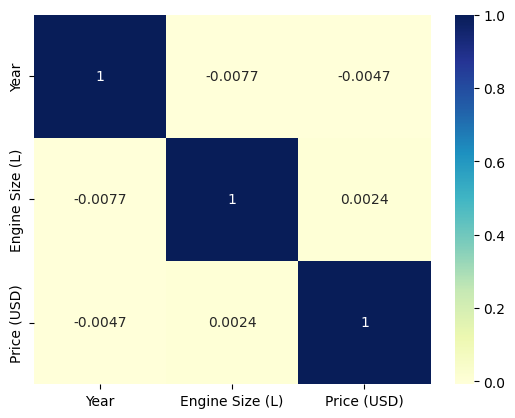

In [66]:
import seaborn as sns
numeric_data = data.select_dtypes(include=[float, int])
corr = numeric_data.corr()

# Generate the heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)


In [67]:
Y = data.iloc[:, :1]
X = data.iloc[:, 1:]

In [68]:
X = pd.get_dummies(X)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(7000, 57)
(3000, 57)


In [57]:
from sklearn.naive_bayes import GaussianNB
# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()
# Train the model
gnb.fit(X_train, Y_train)
#Test the Model
from sklearn.metrics import accuracy_score
# Predict the labels for the test set
y_pred = gnb.predict(X_train)
# Calculate the accuracy
accuracy = accuracy_score(Y_train, y_pred)
print('Gaussian Naive Bayes Classifier')
print('Training Accuracy: ', accuracy)
print('Testing Accuracy: ' , accuracy_score(Y_test, gnb.predict(X_test)))

/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gaussian Naive Bayes Classifier
Training Accuracy:  1.0
Testing Accuracy:  1.0


In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
# Test the Model
print('K-Nearest Neighbors Classifier')
print('Training Accuracy: ', accuracy_score(Y_train, knn.predict(X_train)))
print('Testing Accuracy: ' , accuracy_score(Y_test, knn.predict(X_test)))

/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K-Nearest Neighbors Classifier
Training Accuracy:  0.3221428571428571
Testing Accuracy:  0.106


In [59]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
# Test the Model
print('Decision Tree Classifier')
print('Training Accuracy: ', accuracy_score(Y_train, dt.predict(X_train)))
print('Testing Accuracy: ' , accuracy_score(Y_test, dt.predict(X_test)))

Decision Tree Classifier
Training Accuracy:  1.0
Testing Accuracy:  1.0
